In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [8]:
df['review'].unique()

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [9]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

# EDA:-

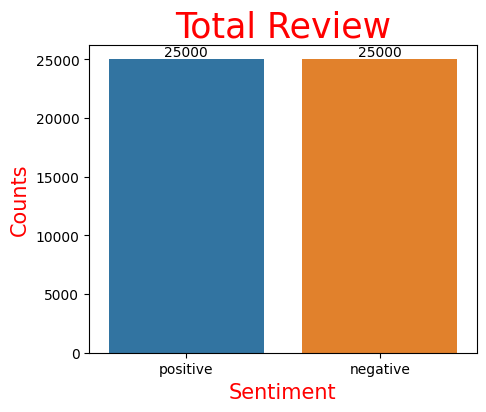

In [10]:
plt.figure(figsize = (5,4))
ax = sns.countplot(data = df, x = 'sentiment', hue = 'sentiment')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Total Review', size = 25, color = 'r')
plt.xlabel("Sentiment", size = 15, color = 'r')
plt.ylabel("Counts", size = 15, color = 'r')
plt.show()

# Text Preprocessing:-

In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
df['length'] = df['review'].apply(len)
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


# Tokenizetion (Paragraph to Sentences):-

In [13]:
from nltk.tokenize import sent_tokenize

In [14]:
df['tokenized_sentences'] = df['review'].apply(lambda x: sent_tokenize(x))

In [15]:
df.head()

,review,sentiment,length,tokenized_sentences
0,One of the other reviewers has mentioned that ...,positive,1761,[One of the other reviewers has mentioned that...
1,A wonderful little production. <br /><br />The...,positive,998,"[A wonderful little production., <br /><br />T..."
2,I thought this was a wonderful way to spend ti...,positive,926,[I thought this was a wonderful way to spend t...
3,Basically there's a family where a little boy ...,negative,748,[Basically there's a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[Petter Mattei's ""Love in the Time of Money"" i..."


In [16]:
df['tokenized_sentences'] = df['tokenized_sentences'].apply(lambda x: ''.join(x))

# Sentences to Word:-

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
df['tokenized_word'] = df['tokenized_sentences'].apply(lambda x: word_tokenize(x))

In [19]:
df.drop('tokenized_sentences', axis = 1, inplace = True)

In [20]:
df.head()

,review,sentiment,length,tokenized_word
0,One of the other reviewers has mentioned that ...,positive,1761,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,998,"[A, wonderful, little, production., <, br, /, ..."
2,I thought this was a wonderful way to spend ti...,positive,926,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,748,"[Basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[Petter, Mattei, 's, ``, Love, in, the, Time, ..."


In [21]:
import string

In [22]:
df['tokenized_word'] = df['tokenized_word'].apply(lambda x: ' '.join(x))

In [23]:
df.head()

,review,sentiment,length,tokenized_word
0,One of the other reviewers has mentioned that ...,positive,1761,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,998,A wonderful little production. < br / > < br /...
2,I thought this was a wonderful way to spend ti...,positive,926,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,748,Basically there 's a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,Petter Mattei 's `` Love in the Time of Money ...


# Convert in Lowercase:-

In [24]:
df['tokenized_word'] = df['tokenized_word'].apply(lambda x: x.lower())

# Removing Punctuation:-

In [25]:
def remove_punc(text):
    return [word for word in text if word not in string.punctuation]

In [26]:
df['tokenized_word'] = df['tokenized_word'].apply(remove_punc)

In [27]:
df.head()

,review,sentiment,length,tokenized_word
0,One of the other reviewers has mentioned that ...,positive,1761,"[o, n, e, , o, f, , t, h, e, , o, t, h, e, ..."
1,A wonderful little production. <br /><br />The...,positive,998,"[a, , w, o, n, d, e, r, f, u, l, , l, i, t, ..."
2,I thought this was a wonderful way to spend ti...,positive,926,"[i, , t, h, o, u, g, h, t, , t, h, i, s, , ..."
3,Basically there's a family where a little boy ...,negative,748,"[b, a, s, i, c, a, l, l, y, , t, h, e, r, e, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,"[p, e, t, t, e, r, , m, a, t, t, e, i, , s, ..."


In [28]:
df['tokenized_word'] = df['tokenized_word'].apply(lambda x: ''.join(x))

In [29]:
df['length_1'] = df['tokenized_word'].apply(len)

In [30]:
df.head()

,review,sentiment,length,tokenized_word,length_1
0,One of the other reviewers has mentioned that ...,positive,1761,one of the other reviewers has mentioned that ...,1738
1,A wonderful little production. <br /><br />The...,positive,998,a wonderful little production br br the ...,986
2,I thought this was a wonderful way to spend ti...,positive,926,i thought this was a wonderful way to spend ti...,921
3,Basically there's a family where a little boy ...,negative,748,basically there s a family where a little boy ...,737
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei s love in the time of money is...,1300


In [31]:
df['tokenized_word'].unique()

array(['one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hookedthey are right  as this is exactly what happened with me  br    br   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word gotrust me  this is not a show for the faint hearted or timidthis show pulls no punches with regards to drugs  sex or violenceits is hardcore  in the classic use of the word  br    br   it is called oz as that is the nickname given to the oswald maximum security state penitentaryit focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agendaem city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more  so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   i would say the main appeal of the show is due to the fact that

# Removing stopwords:-

In [32]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

In [35]:
df['tokenized_word'] = df['tokenized_word'].apply(remove_stopwords)

In [36]:
df['length(after_stopword)'] = df['tokenized_word'].apply(len)

In [37]:
df.head()

,review,sentiment,length,tokenized_word,length_1,length(after_stopword)
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching 1 oz episode ...,1738,1160
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production br br filming tech...,986,675
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,921,588
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...,737,460
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...,1300,884


# Stemming & Lemmatization:-

In [38]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [39]:
# Apply stemming
df['stemmed_word'] = df['tokenized_word'].apply(lambda x: [stemmer.stem(word) for word in x])

In [40]:
df.head()

,review,sentiment,length,tokenized_word,length_1,length(after_stopword),stemmed_word
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching 1 oz episode ...,1738,1160,"[o, n, e, , r, e, v, i, e, w, e, r, s, , m, ..."
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production br br filming tech...,986,675,"[w, o, n, d, e, r, f, u, l, , l, i, t, t, l, ..."
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,921,588,"[t, h, o, u, g, h, t, , w, o, n, d, e, r, f, ..."
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...,737,460,"[b, a, s, i, c, a, l, l, y, , f, a, m, i, l, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...,1300,884,"[p, e, t, t, e, r, , m, a, t, t, e, i, , l, ..."


In [41]:
df['stemmed_word'] = df['stemmed_word'].apply(lambda x: ''.join(x))

In [42]:
df['length_3'] = df['stemmed_word'].apply(len)

In [43]:
df.head()

,review,sentiment,length,tokenized_word,length_1,length(after_stopword),stemmed_word,length_3
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching 1 oz episode ...,1738,1160,one reviewers mentioned watching 1 oz episode ...,1160
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production br br filming tech...,986,675,wonderful little production br br filming tech...,675
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,921,588,thought wonderful way spend time hot summer we...,588
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...,737,460,basically family little boy jake thinks zombie...,460
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...,1300,884,petter mattei love time money visually stunnin...,884


In [44]:
# Apply lemmatization
df['lemmatized_word'] = df['stemmed_word'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [45]:
df.head()

,review,sentiment,length,tokenized_word,length_1,length(after_stopword),stemmed_word,length_3,lemmatized_word
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching 1 oz episode ...,1738,1160,one reviewers mentioned watching 1 oz episode ...,1160,"[o, n, e, , r, e, v, i, e, w, e, r, s, , m, ..."
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production br br filming tech...,986,675,wonderful little production br br filming tech...,675,"[w, o, n, d, e, r, f, u, l, , l, i, t, t, l, ..."
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,921,588,thought wonderful way spend time hot summer we...,588,"[t, h, o, u, g, h, t, , w, o, n, d, e, r, f, ..."
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...,737,460,basically family little boy jake thinks zombie...,460,"[b, a, s, i, c, a, l, l, y, , f, a, m, i, l, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...,1300,884,petter mattei love time money visually stunnin...,884,"[p, e, t, t, e, r, , m, a, t, t, e, i, , l, ..."


In [46]:
df['lemmatized_word'] = df['lemmatized_word'].apply(lambda x: ''.join(x))

In [47]:
df['length_4'] = df['lemmatized_word'].apply(len)

In [48]:
df.head()

,review,sentiment,length,tokenized_word,length_1,length(after_stopword),stemmed_word,length_3,lemmatized_word,length_4
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewers mentioned watching 1 oz episode ...,1738,1160,one reviewers mentioned watching 1 oz episode ...,1160,one reviewers mentioned watching 1 oz episode ...,1160
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production br br filming tech...,986,675,wonderful little production br br filming tech...,675,wonderful little production br br filming tech...,675
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,921,588,thought wonderful way spend time hot summer we...,588,thought wonderful way spend time hot summer we...,588
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake thinks zombie...,737,460,basically family little boy jake thinks zombie...,460,basically family little boy jake thinks zombie...,460
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...,1300,884,petter mattei love time money visually stunnin...,884,petter mattei love time money visually stunnin...,884


In [49]:
df.drop(['review','length','tokenized_word','length_1','length(after_stopword)','stemmed_word','length_3','length_4'], axis =1, inplace = True)

In [50]:
df.head()

,sentiment,lemmatized_word
0,positive,one reviewers mentioned watching 1 oz episode ...
1,positive,wonderful little production br br filming tech...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter mattei love time money visually stunnin...


# Bag of Words (for vectorization):-

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
bow = CountVectorizer().fit(df['lemmatized_word'])

In [61]:
print(len(bow.vocabulary_))

333561


In [65]:
x = bow.transform(df['lemmatized_word'])

# Model Training:-

In [63]:
from sklearn.model_selection import train_test_split

In [66]:
y = df['sentiment']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35000, 333561), (15000, 333561), (35000,), (15000,))

# Model Implementation:-

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [72]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [73]:
model.score(x_train,y_train)

0.9992285714285715

In [74]:
prediction = model.predict(x_test)

In [75]:
model.score(x_test,y_test)

0.8831333333333333

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction, y_test)

array([[6504,  846],
       [ 907, 6743]], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [99]:
print("Accuracy : ", accuracy_score(prediction, y_test))
print("Precision : ", precision_score(prediction, y_test, average = 'weighted'))
print("Recall : ", recall_score(prediction, y_test, average = 'weighted'))

Accuracy :  0.8831333333333333
Precision :  0.8831776945870013
Recall :  0.8831333333333333


# With TF-IDF

In [87]:
X = df['lemmatized_word']

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(max_iter=1000)


from sklearn.pipeline import Pipeline

In [94]:
model1 = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model1.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [95]:
pred = model1.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, Y_test)

array([[6503,  787],
       [ 908, 6802]], dtype=int64)

In [98]:
print("Accuracy : ", accuracy_score(pred, Y_test))
print("Precision : ", precision_score(pred, Y_test, average = 'weighted'))
print("Recall : ", recall_score(pred, Y_test, average = 'weighted'))

Accuracy :  0.887
Precision :  0.8871517973224283
Recall :  0.887


# With Decision Tree:-

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
tree_model = DecisionTreeClassifier()

In [105]:
t_model = Pipeline([('vectorizer',tvec),('classifier',tree_model)])

t_model.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [110]:
t_model.score(X_train,Y_train)

1.0

In [107]:
t_pred = t_model.predict(X_test)

In [108]:
confusion_matrix(t_pred, Y_test)

array([[5331, 2272],
       [2080, 5317]], dtype=int64)

In [109]:
print("Accuracy : ", accuracy_score(t_pred, Y_test))
print("Precision : ", precision_score(t_pred, Y_test, average = 'weighted'))
print("Recall : ", recall_score(t_pred, Y_test, average = 'weighted'))

Accuracy :  0.7098666666666666
Precision :  0.7101062417648774
Recall :  0.7098666666666666


# With RandomForest:-

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
r_model = RandomForestClassifier(n_estimators=500)

In [115]:
rf_model = Pipeline([('vectorizer',tvec),('classifier',r_model)])

rf_model.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=500))])

In [116]:
rf_model.score(X_train,Y_train)

1.0

In [117]:
rf_pred = rf_model.predict(X_test)

In [118]:
confusion_matrix(rf_pred, Y_test)

array([[6402, 1098],
       [1009, 6491]], dtype=int64)

In [119]:
print("Accuracy : ", accuracy_score(rf_pred, Y_test))
print("Precision : ", precision_score(rf_pred, Y_test, average = 'weighted'))
print("Recall : ", recall_score(rf_pred, Y_test, average = 'weighted'))

Accuracy :  0.8595333333333334
Precision :  0.8595839691487934
Recall :  0.8595333333333334


# With SVC:-

In [120]:
from sklearn.svm import SVC

In [121]:
svc = SVC()

In [123]:
svm_model = Pipeline([('vectorizer',tvec),('classifier',svc)])

svm_model.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [124]:
svm_model.score(X_train,Y_train)

0.9930285714285715

In [125]:
svm_pred = svm_model.predict(X_test)

In [126]:
confusion_matrix(svm_pred, Y_test)

array([[6528,  722],
       [ 883, 6867]], dtype=int64)

In [127]:
print("Accuracy : ", accuracy_score(svm_pred, Y_test))
print("Precision : ", precision_score(svm_pred, Y_test, average = 'weighted'))
print("Recall : ", recall_score(svm_pred, Y_test, average = 'weighted'))

Accuracy :  0.893
Precision :  0.893257702120151
Recall :  0.893


# With XGBoost:-

In [128]:
import xgboost as xgb

In [130]:
xgb_m = xgb.XGBClassifier()

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [137]:
Y_test_encoded = label_encoder.fit_transform(Y_test)

In [134]:
xgb_model = Pipeline([('vectorizer',tvec),('classifier',xgb_m)])

xgb_model.fit(X_train,Y_train_encoded)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [136]:
xgb_model.score(X_train,Y_train_encoded)

0.9239714285714286

In [138]:
xgb_pred = xgb_model.predict(X_test)

In [139]:
confusion_matrix(xgb_pred, Y_test_encoded)

array([[6126, 1008],
       [1285, 6581]], dtype=int64)

In [141]:
print("Accuracy : ", accuracy_score(xgb_pred, Y_test_encoded))
print("Precision : ", precision_score(xgb_pred, Y_test_encoded, average = 'weighted'))
print("Recall : ", recall_score(xgb_pred, Y_test_encoded, average = 'weighted'))

Accuracy :  0.8471333333333333
Precision :  0.8478824721042052
Recall :  0.8471333333333333
